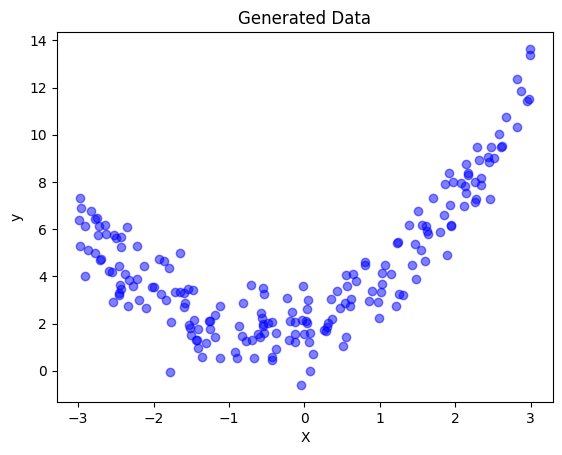

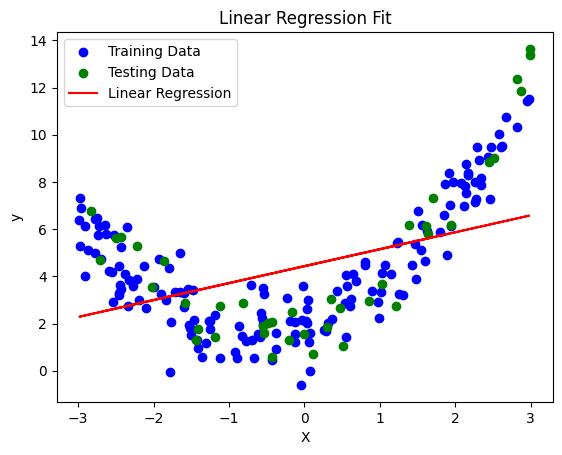

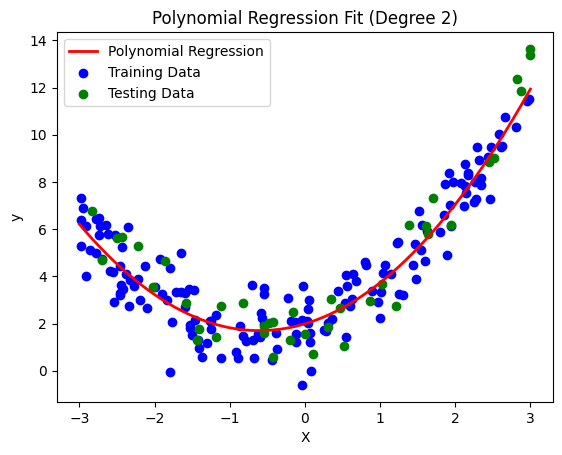

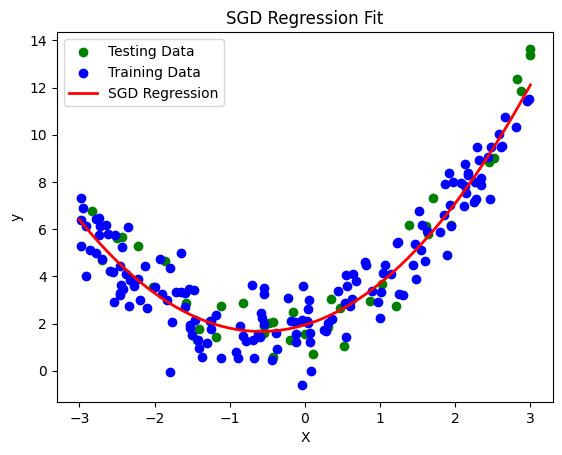

Linear Regression R_2: 0.2851305252148677
Polynomial Regression (Degree 2) R_2: 0.9262873886225129
SGD Regression R_2: 0.9324180465376813


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import plotly.express as px
import plotly.graph_objects as go

# Generate synthetic dataset
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# Visualizing the dataset
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Data")
plt.show()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
linear_r2 = r2_score(y_test, y_pred_linear)

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_train, linear_reg.predict(X_train), color='red', label='Linear Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = poly_reg.predict(X_new_poly)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Polynomial Regression")
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression Fit (Degree 2)")
plt.show()

# Gradient Descent (SGD)
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train_poly, y_train.ravel())
y_pred_sgd = sgd.predict(X_test_poly)
sgd_r2 = r2_score(y_test, y_pred_sgd)

plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_new, sgd.predict(poly.transform(X_new)), "r-", linewidth=2, label="SGD Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("SGD Regression Fit")
plt.show()

# 3D Polynomial Regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100, 1)

# 3D Scatter Plot
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel(), title="3D Data Distribution")
fig.show()

# Train a Linear Model on 3D Data
X_multi = np.hstack([x, y])
lr_3d = LinearRegression()
lr_3d.fit(X_multi, z)

# Create Mesh Grid for Predictions
x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
x_grid, y_grid = np.meshgrid(x_input, y_input)
final_grid = np.c_[x_grid.ravel(), y_grid.ravel()]
z_final = lr_3d.predict(final_grid).reshape(10, 10)

# 3D Surface Plot
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.show()

# Print R^2 scores
print("Linear Regression R_2:", linear_r2)
print("Polynomial Regression (Degree 2) R_2:", poly_r2)
print("SGD Regression R_2:", sgd_r2)
